#### Notebook style configuration <span style="font-weight:200;">(optional)</span>

In [ ]:
from IPython.core.display import display, HTML
style = open("data/style.css").read()
display(HTML("<style>%s</style>" % style))

### Table of contents <a name="TOC"></a>

* [Catalogue](#catalogue)
* [Line plot](#line_plot)
* [Scatter plot](#scatter_plot)
* [Image plot](#image_plot)
* [Bar plot](#bar_plot)


# Catalogue <a name="catalogue"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

In this lesson, we'll review a few of the many different types of plot matplotlib offers and manipulate them.


<img src="data/plot-basic.png" width="50%" align="right" /> <img src="data/plot-advanced.png" width="50%" />


These images come from the [cheatsheets](https://github.com/matplotlib/cheatsheets).


## Initialization 

Before we start, let's set some default settings such that we do not have to write them each time we start a new figure.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

p = plt.rcParams
p["figure.dpi"] = 200

# Line plot <a name="line_plot"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

We have already manipulated line [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) in the first lesson but we used it to render a... line plot (how surprising!). But this command is actually much more powerful and it can be used to render many other types of plot such as, for example, a scatter plot. 

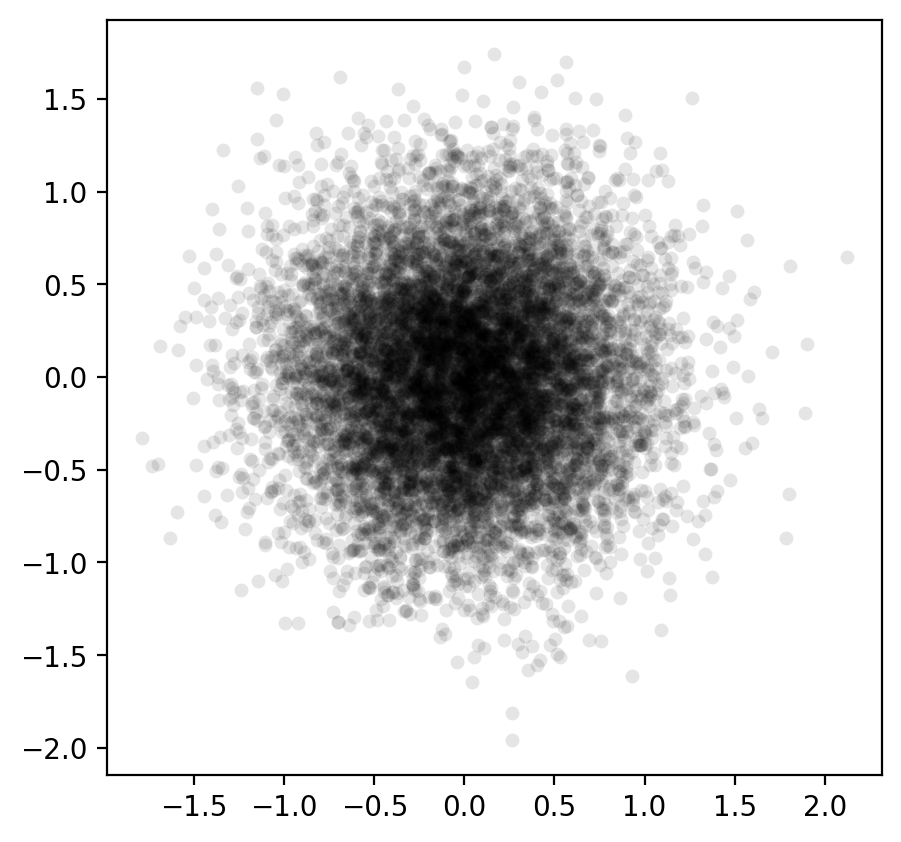

In [3]:
X = np.random.normal(0.0, .5, 10000)
Y = np.random.normal(0.0, .5, len(X))

fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.plot(X, Y, linestyle="", color="black", alpha=0.1,
              marker="o", markersize=5, markeredgewidth=0)

plt.show();

In the figure above, we took advantage of the `alpha` parameter that sets the transparency level of markers. Consequently, areas with a higher number of point will be more opaque, suggesting density to the reader.

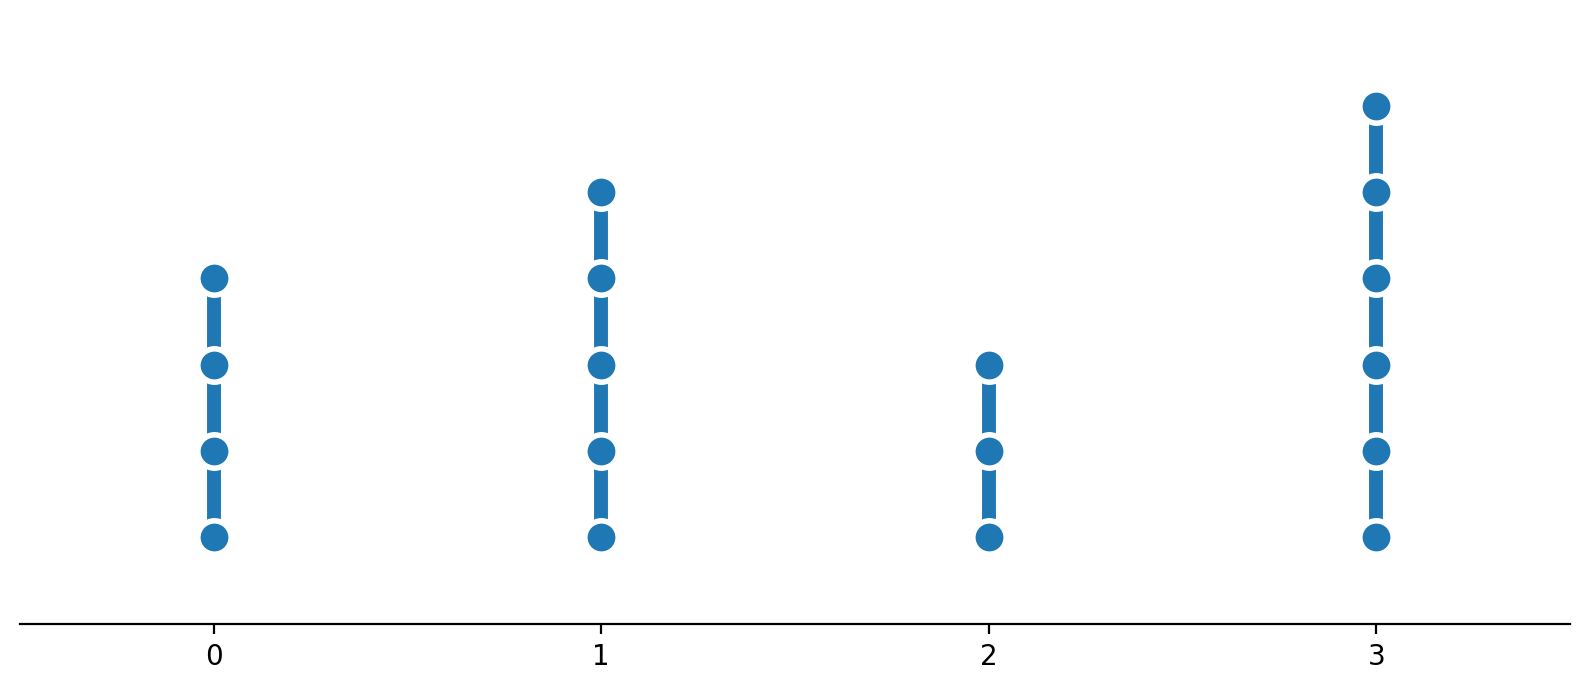

In [4]:
X = [ 0,0,0,0, None, 1,1,1,1,1, None, 2,2,2, None, 3,3,3,3,3,3]
Y = [ 1,2,3,4, None, 1,2,3,4,5, None, 1,2,3, None, 1,2,3,4,5,6]  

fig = plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.plot(X, Y, "-o", linewidth=5,
        markersize=12, markeredgecolor="white", markeredgewidth=2)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(-.5,3.5); ax.set_xticks([0,1,2,3])
ax.set_ylim(0,7); ax.set_yticks([])

plt.show();

In the figure above, the important point to notice is the use of the `None` keyword in X and Y. This indicates matpltolib that we have several series and matplotlib won't draw a line between the end point of a series and the start point of the next series.


We can also combine several line plots to create a specific effect. For example, here is a progress bar made of several plots with various parameters. Here we take advantage of very thick line and specify the line capstyle to be round (instead of square).

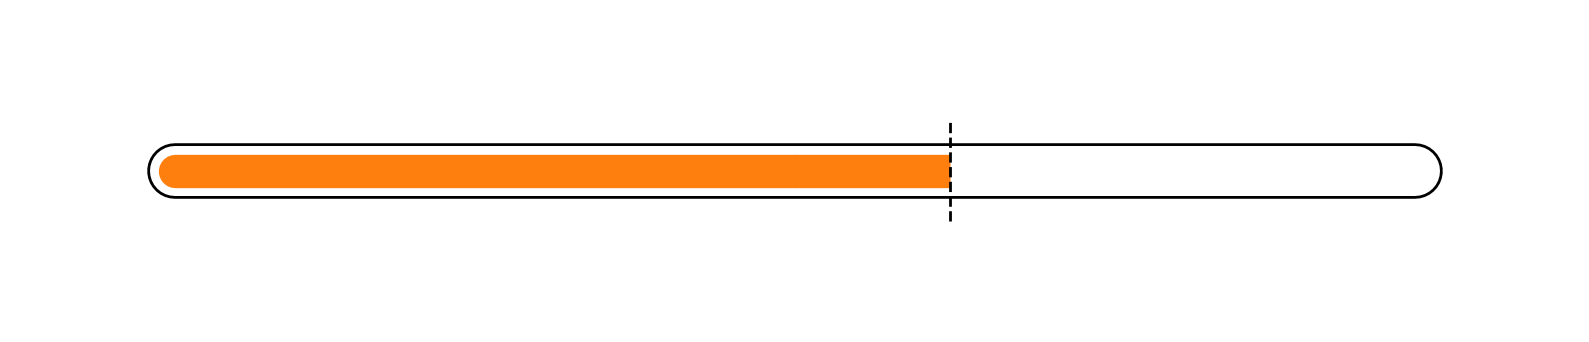

In [5]:
fig = plt.figure(figsize=(10,2))
ax = plt.subplot(frameon=False)

ax.plot([1,9], [0,0], linewidth=20, color="black", solid_capstyle="round")
ax.plot([1,9], [0,0], linewidth=18, color="white", solid_capstyle="round")
ax.plot([1,5], [0,0], linewidth=12, color="C1",    solid_capstyle="round")
ax.plot([5,6], [0,0], linewidth=12, color="C1",    solid_capstyle="butt")
ax.plot([6,6], [-0.5,0.5], "--", linewidth=1, color="black")

ax.set_xlim(0,10); ax.set_xticks([])
ax.set_ylim(-1.5,1.5); ax.set_yticks([])

plt.show();

---

# Scatter plot <a name="scatter_plot"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

We have just seen that the `plot` command can be used to draw a scatter plot and yet, there exists a [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function. You may ask yourself what is the different between these two functions. In fact, the regular plot command can be used to represent as scatter plot as long as points share the same properties, i.e. share the same color and size. If for some reason we need to have different colors or sizes, then we need to use the scatter command.

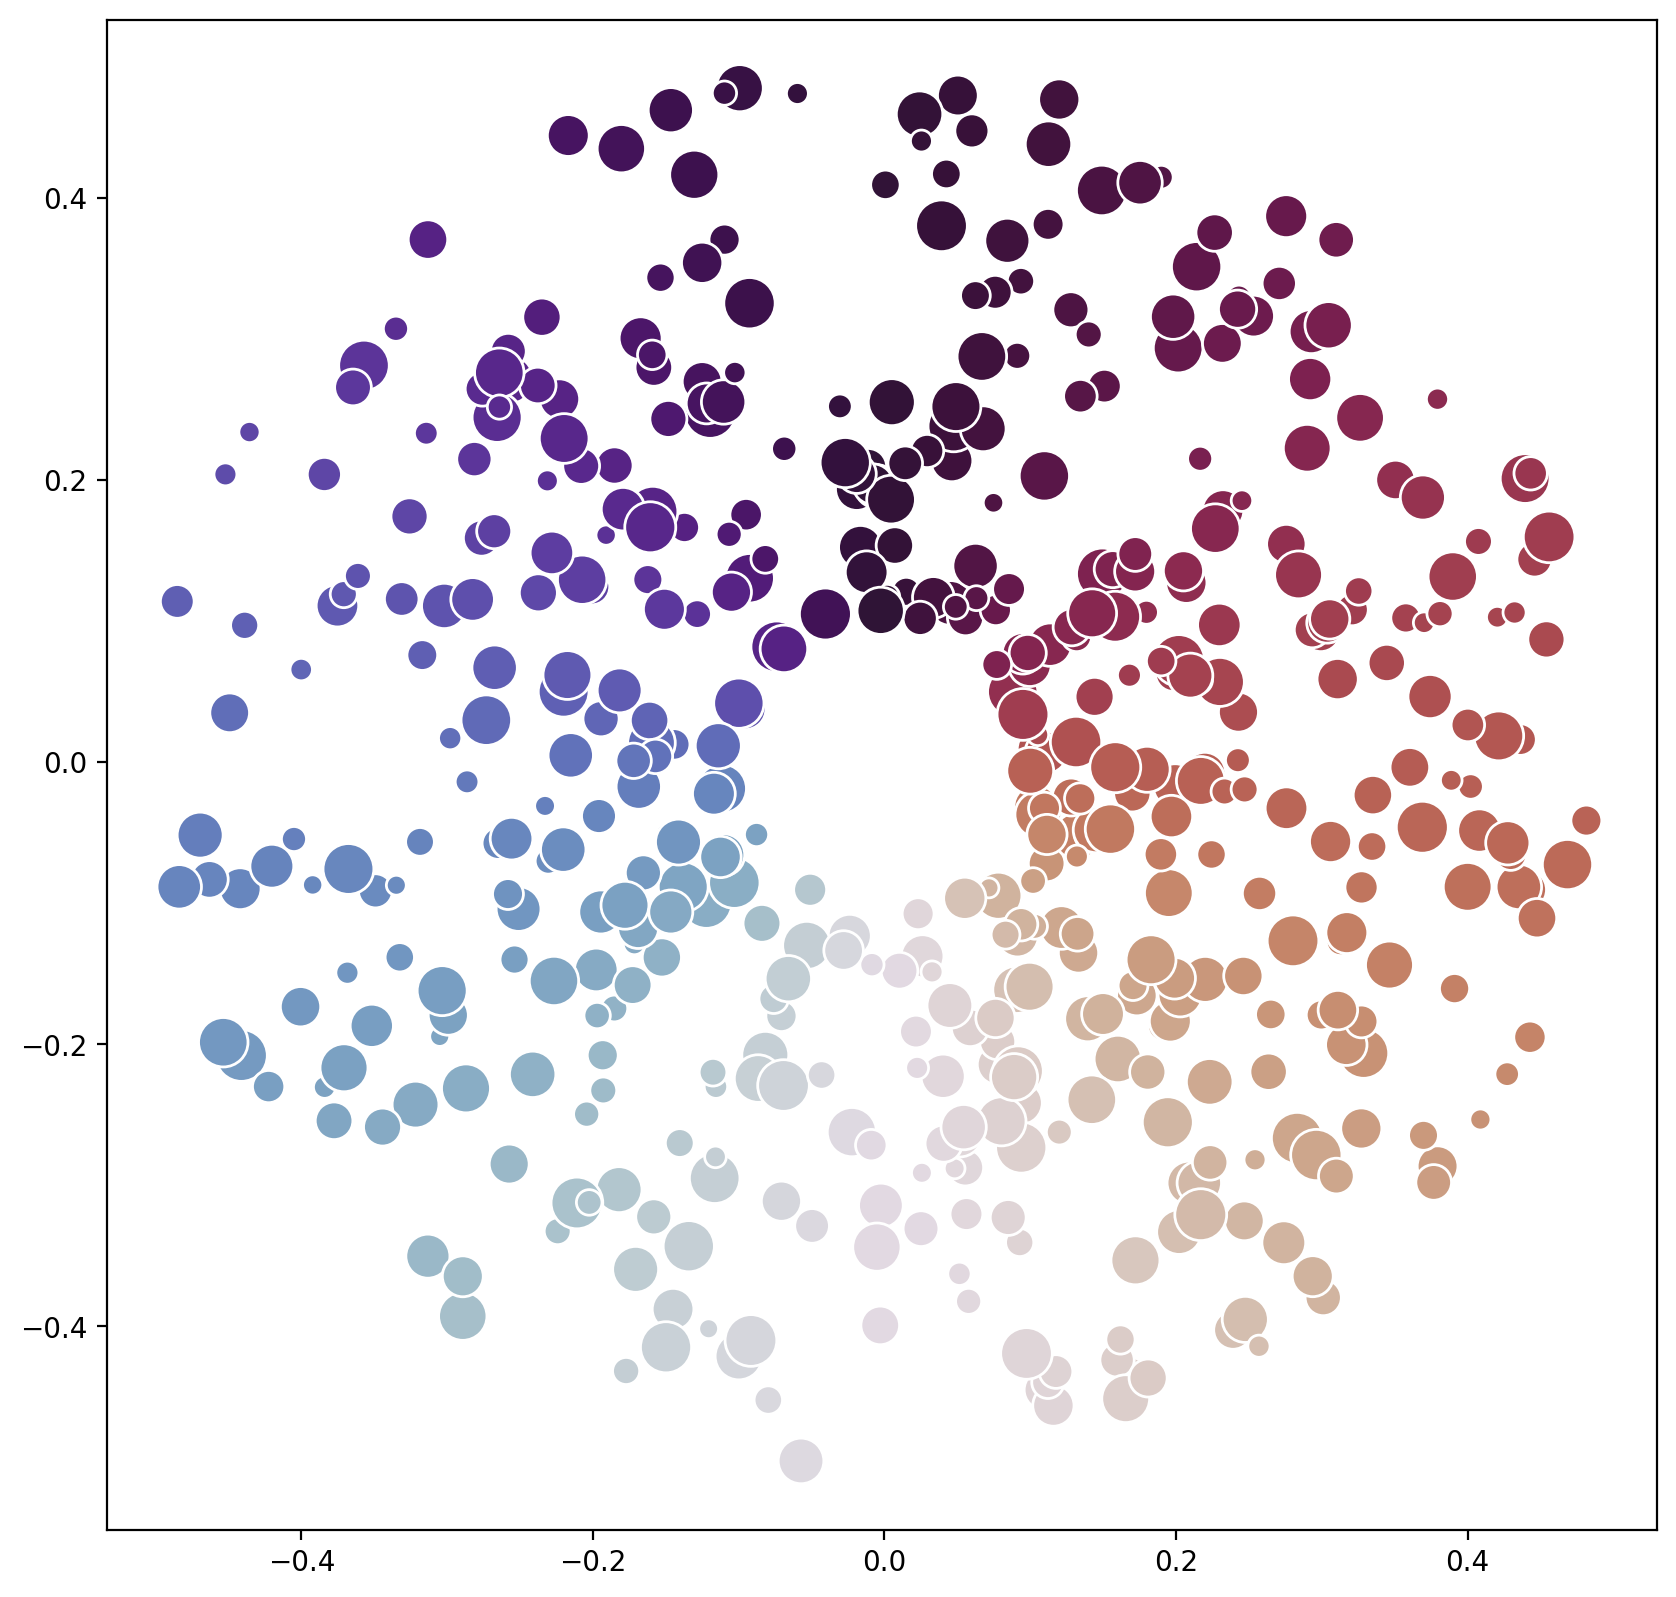

In [6]:
T = np.random.uniform(0, 2*np.pi, 500)
R = np.random.uniform(0.1, 0.5, len(T))
X, Y = R*np.cos(T), R*np.sin(T)        # Position
S = np.random.uniform(50, 350, len(X)) # Size
V = np.arctan2(X,Y)                    # Value 

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
ax.scatter(X, Y, S, V, cmap="twilight", edgecolor="white")

plt.show();

In the example above, each marker possesses its own size and color (using a colormap based on point angle). We could even specify individual marker type.

Scatter can thus be used to produce heat map veary easily as shown below.

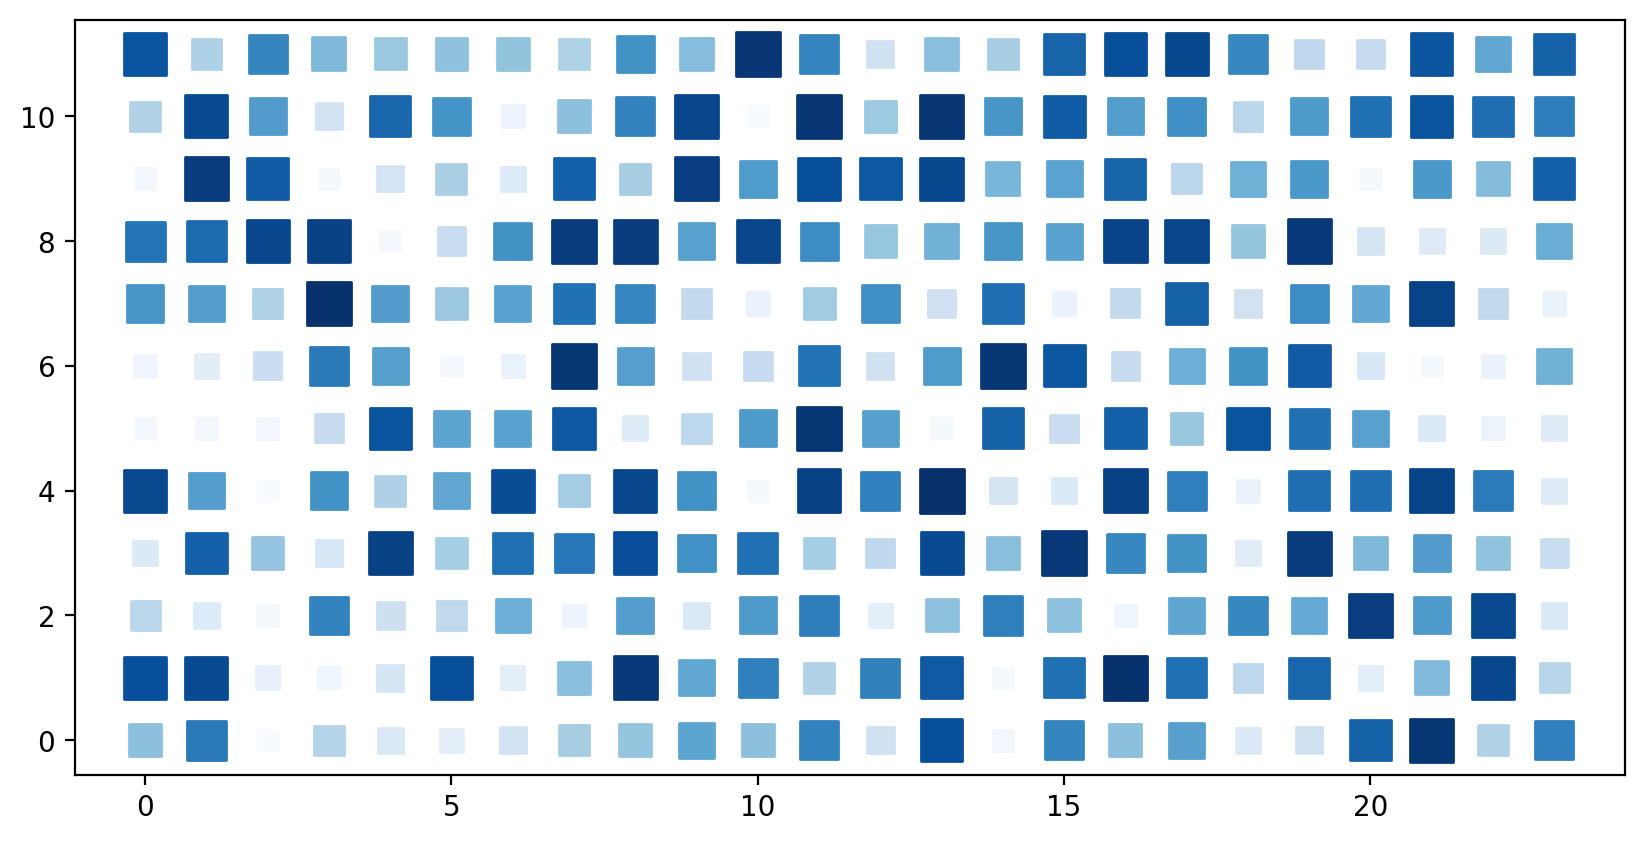

In [7]:
np.random.seed(1);
X, Y = np.arange(24), np.arange(12)
X, Y = np.meshgrid(X,Y)
V = np.random.uniform(50, 250, X.shape) 

fig = plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.scatter(X, Y, V, V, marker='s', cmap="Blues")

plt.show();

We can also add "special effect" like we did previously with the line plot by plotting the scatter plot several times to highlight contour.

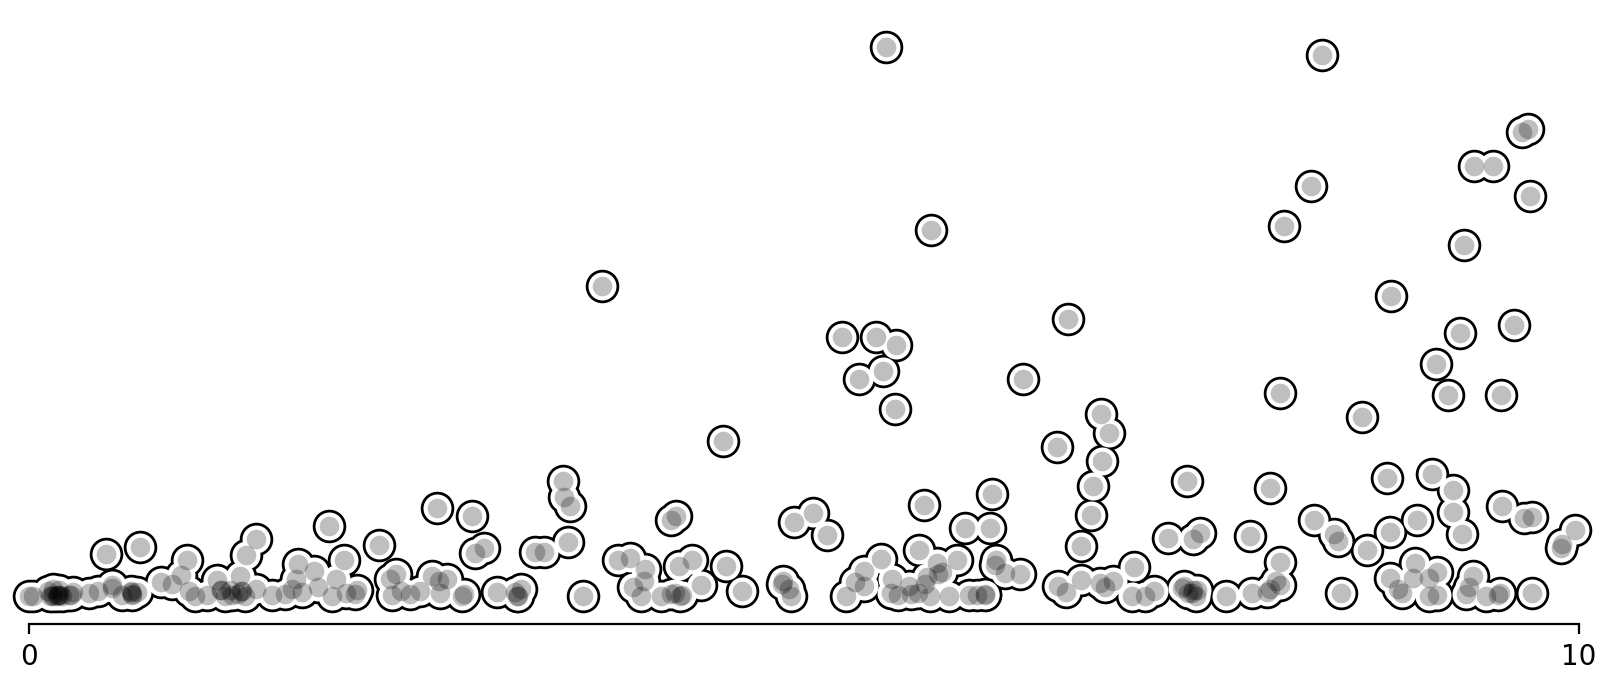

In [21]:
np.random.seed(1)
X = np.random.uniform(0,10,250)
Y = X*np.abs(np.random.normal(0,1,len(X)))**2

fig = plt.figure(figsize=(10,4));
ax = plt.subplot();

clip_on = False
ax.scatter(X, Y, 50, linewidth=5, color="black", clip_on=clip_on);
ax.scatter(X, Y, 50, linewidth=3, color="white", clip_on=clip_on);
ax.scatter(X, Y, 50, linewidth=0, color="black", alpha=0.25, clip_on=clip_on);

ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);
ax.spines['top'].set_visible(False);
ax.set_xlim(0,10); ax.set_xticks([0,10])
ax.set_yticks([])

plt.show();

Note that for this last example, we need to tell maplotlib not to clip markers that are oustide the axis (x=0 and x=10) using `clip_on=False` argument.

---

# Image plot <a name="image_plot"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

We saw in the previous section how to do a heat map using a scatter plot. If we had used a fixed marker size, we could have use it to display an image. But this would be very inefficient. Instead, we can use the dedicated function [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) which means image show. 

Let's first generate some data.

In [9]:
def f(x,y,n=100):
    X,Y = np.meshgrid(np.linspace(-3, 3, n),
                      np.linspace(-3, 3, n))
    return (1-X/2+X**5+Y**3)*np.exp(-X**2-Y**2)
Z5  = f(X, Y, n=5)
Z10 = f(X, Y, n=10)
Z25 = f(X, Y, n=25)
Z50 = f(X, Y, n=50)
Z100 = f(X, Y, n=100)

We are now ready to display them.

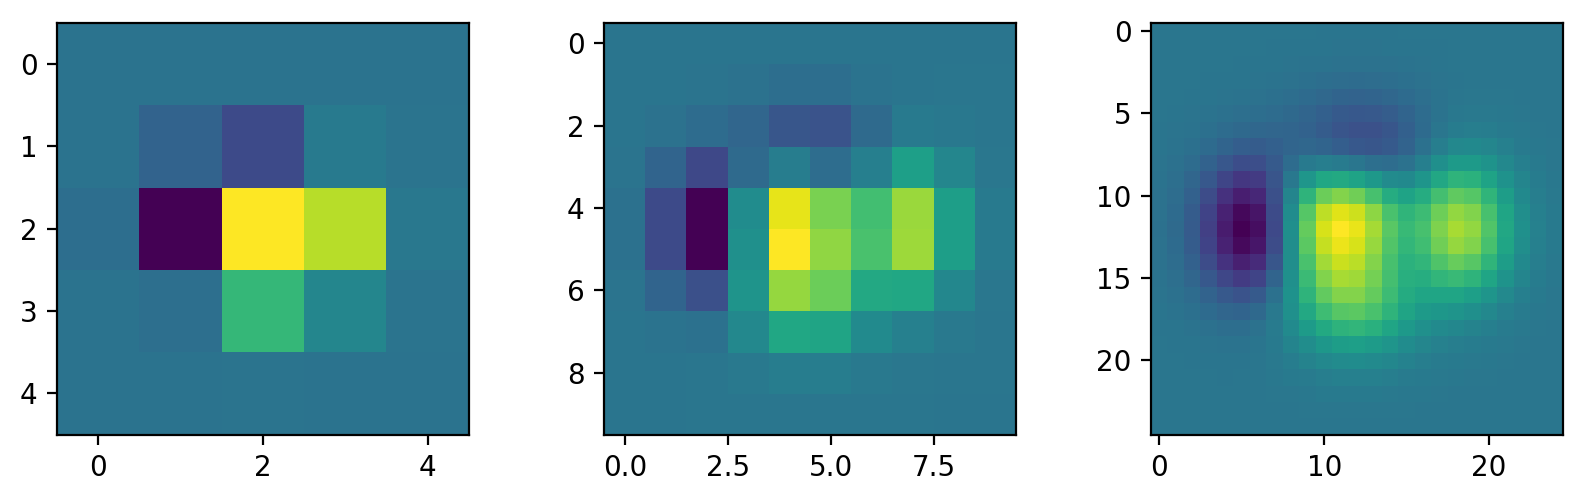

In [22]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(2,3,1); ax.imshow(Z5)
ax = plt.subplot(2,3,2); ax.imshow(Z10)
ax = plt.subplot(2,3,3); ax.imshow(Z25)

plt.show();

To be able to display these images, matplotlib made several implicit choices. First, you may have noticed that the limit on the axis are different on each of the three plots and do not relate to the [-3,+3] domain we used to define the image. The reason is that matpltolib has not idea where your images come from and cannot guess these limits. To solve this problem, we thus need to specify the extent of the image.

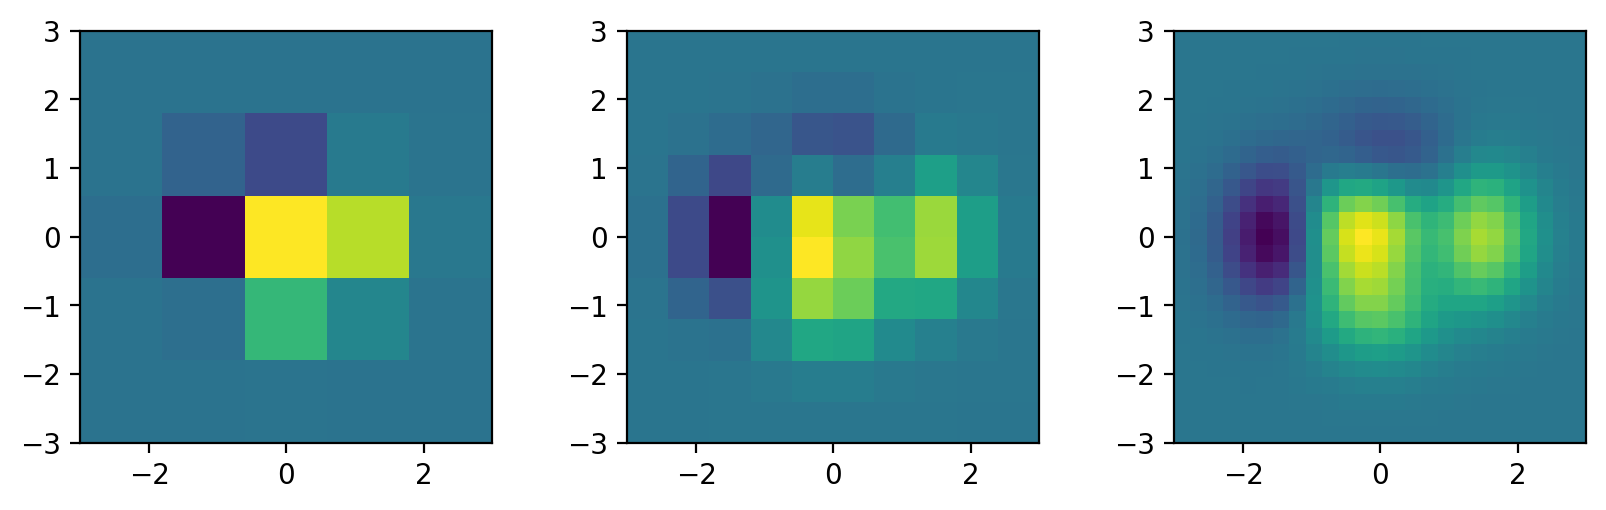

In [11]:
fig = plt.figure(figsize=(10,6))

extent = [-3,+3,-3,+3]
ax = plt.subplot(2,3,1); ax.imshow(Z5, extent=extent)     
ax = plt.subplot(2,3,2); ax.imshow(Z10, extent=extent)
ax = plt.subplot(2,3,3); ax.imshow(Z25, extent=extent)

plt.show();

The second choice matplotlib made concerns colors. Our arrays Z5, Z10 and Z25 are really two-dimensional scalar arrays and the question is thus, how do we map a scalar to a color? To do that, matplotlib uses what is called a colormap that map a normalized value to a given color. The default colormap is called "viridis" but there are [plenty of others](https://matplotlib.org/stable/tutorials/colors/colormaps.html). Let's try "RdYlBu".

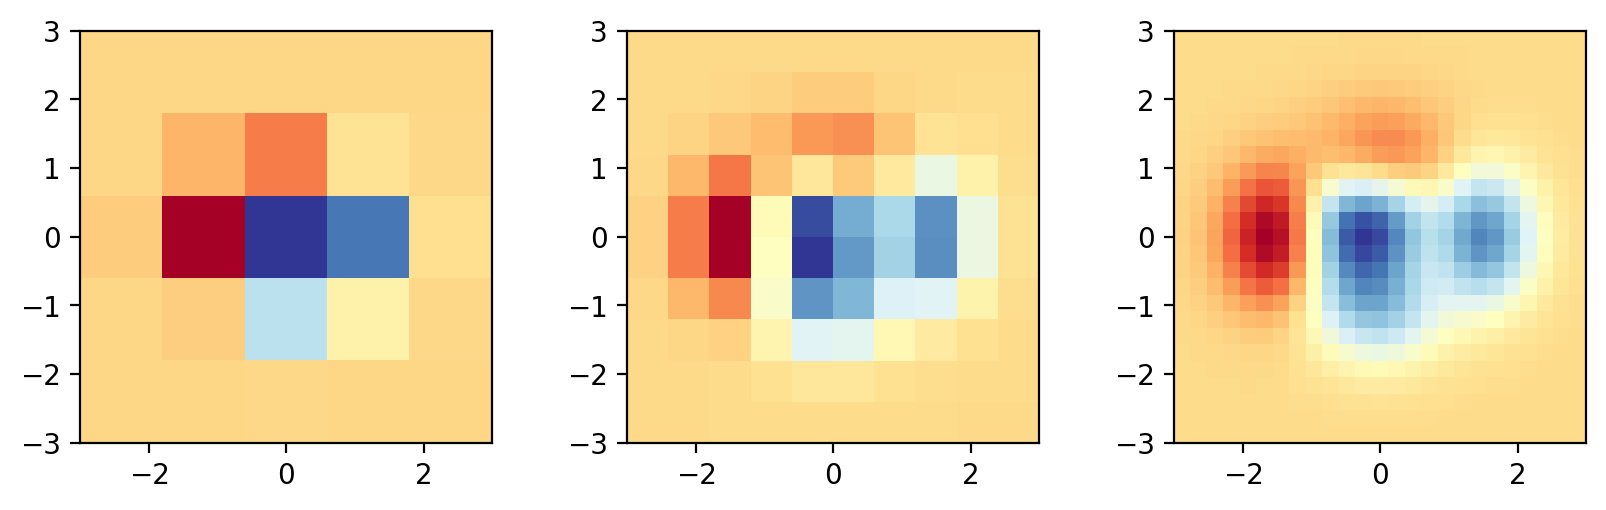

In [12]:
fig = plt.figure(figsize=(10,6))

extent = [-3,+3,-3,+3]
cmap = "RdYlBu"

ax = plt.subplot(2,3,1); ax.imshow(Z5, extent=extent, cmap=cmap)
ax = plt.subplot(2,3,2); ax.imshow(Z10, extent=extent, cmap=cmap)
ax = plt.subplot(2,3,3); ax.imshow(Z25, extent=extent, cmap=cmap)

plt.show();

On important implicit choice when displaying image is the interpolation methods between pixels composing the oputput. The default method is to use the nearest filter which results in pixelated images. This is a sane default for scientific visualization. However, in some specific case, you might want to use a smoother interpolation method and you can do so by proidivind the name to method among [those availables](https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html?highlight=interpolation). Let's see the effect of the bicubic method.

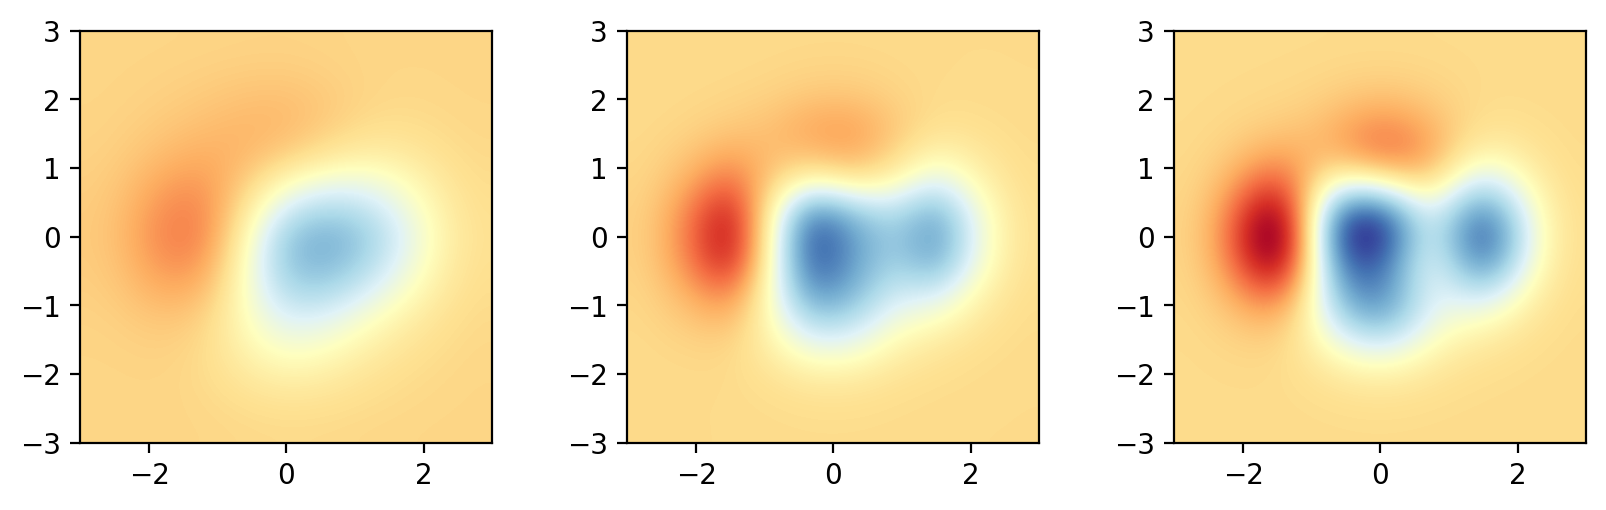

In [13]:
fig = plt.figure(figsize=(10,6))

extent = [-3,+3,-3,+3]
cmap = "RdYlBu"
interpolation = "bicubic"

ax = plt.subplot(2,3,1);
ax.imshow(Z5, extent=extent, cmap=cmap, interpolation=interpolation)
ax = plt.subplot(2,3,2) 
ax.imshow(Z10, extent=extent, cmap=cmap, interpolation=interpolation)
ax = plt.subplot(2,3,3)
ax.imshow(Z25, extent=extent, cmap=cmap, interpolation=interpolation)

plt.show();

Since we are using a colormap we need to show how scalar values are mapped to colors and for this we need to add a colorbar. Since there are three images, we should use three colorbars because the mapping could potentially different. This is not the case here because we are using the same data in each image. But let's pretend it's not the case. To ensure the mapping is the same in all three images, we'll explicitely set what is the minimum ( `vmin` ) and maximum ( `vmax` ) values.

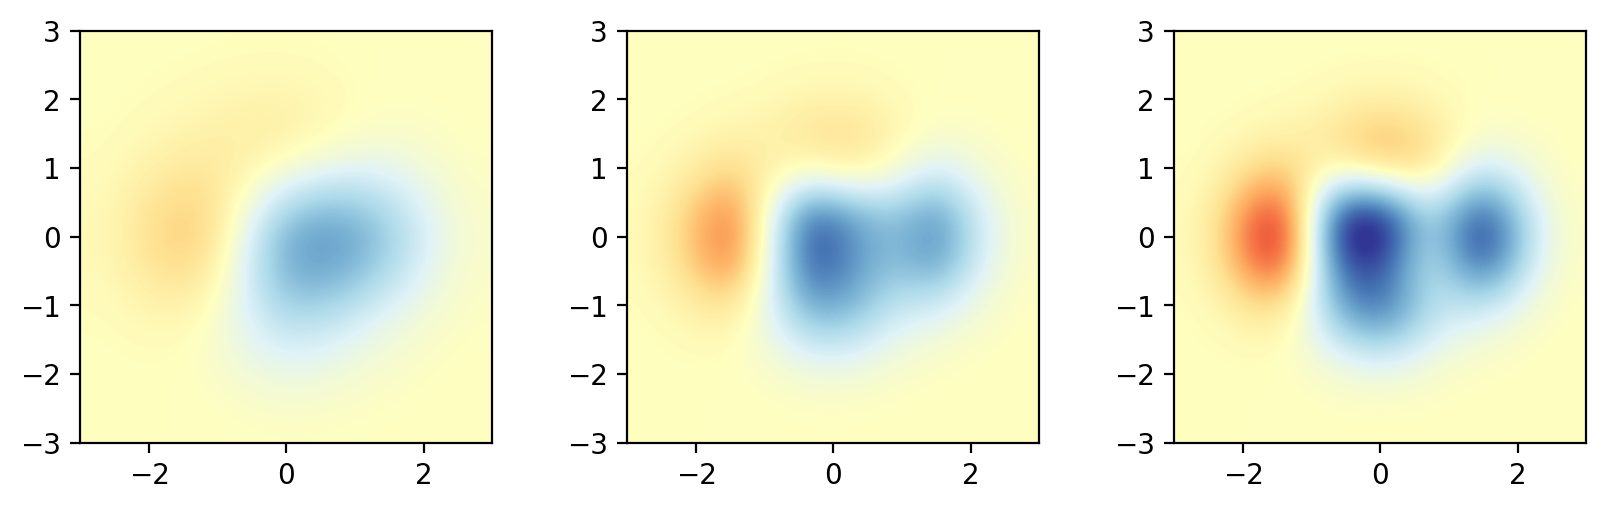

In [14]:
fig = plt.figure(figsize=(10,6))

extent = [-3,+3,-3,+3]
cmap = "RdYlBu"
interpolation = "bicubic"
vmin, vmax = -1, 1

ax = plt.subplot(2,3,1);
ax.imshow(Z5, extent=extent, interpolation=interpolation,
              cmap=cmap,  vmin=vmin, vmax=vmax)
ax = plt.subplot(2,3,2); 
ax.imshow(Z10, extent=extent, interpolation=interpolation,
              cmap=cmap,  vmin=vmin, vmax=vmax)

ax = plt.subplot(2,3,3);
ax.imshow(Z25, extent=extent, interpolation=interpolation,
              cmap=cmap,  vmin=vmin, vmax=vmax)

plt.show();

Let's now display a colorbar on the left. To that, we'll use a gridspec and specify width ratio as we did in the introduction.

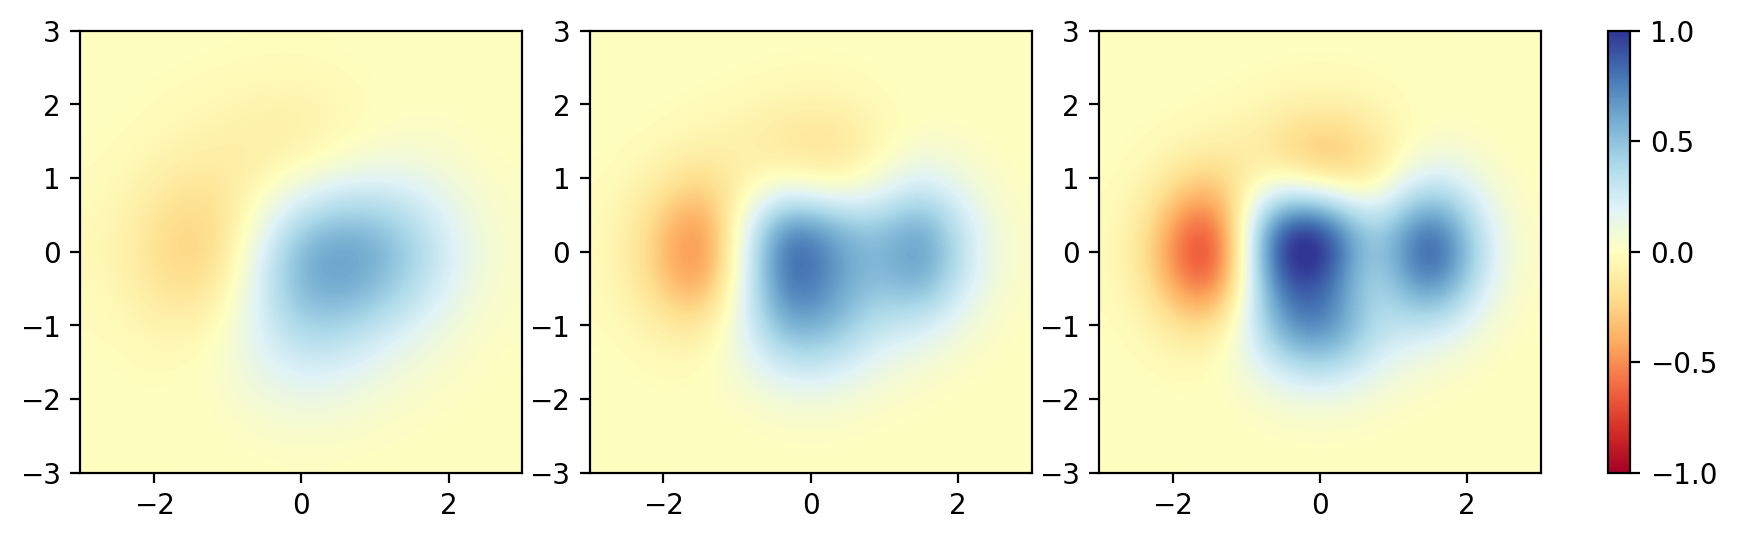

In [15]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,6));
G = GridSpec(1, 4, width_ratios=(20, 20, 20, 1))

extent = [-3,+3,-3,+3]
cmap = "RdYlBu"
interpolation = "bicubic"
vmin, vmax = -1, 1

ax = plt.subplot(G[0], aspect=1);
I = ax.imshow(Z5, extent=extent, interpolation=interpolation,
              cmap=cmap,  vmin=vmin, vmax=vmax)
ax = plt.subplot(G[1], aspect=1) 
I = ax.imshow(Z10, extent=extent, interpolation=interpolation,
              cmap=cmap,  vmin=vmin, vmax=vmax)
ax = plt.subplot(G[2], aspect=1)
I = ax.imshow(Z25, extent=extent, interpolation=interpolation,
              cmap=cmap,  vmin=vmin, vmax=vmax)
    
plt.colorbar(I, cax=plt.subplot(G[3], aspect=20))

plt.show();

To finish our plot, let's add some contour levels using the [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) function. Since we have several arrays showing the same data with different resolution ( `Z5`, `Z10`, `Z25`, `Z50` and `Z100` ), we can use the highest resolution to compute the contours. This will result in much smoother curves. Note that we need to vertically re-orient the contour (using the `origin` argument) such that it matches the orientation of the image.

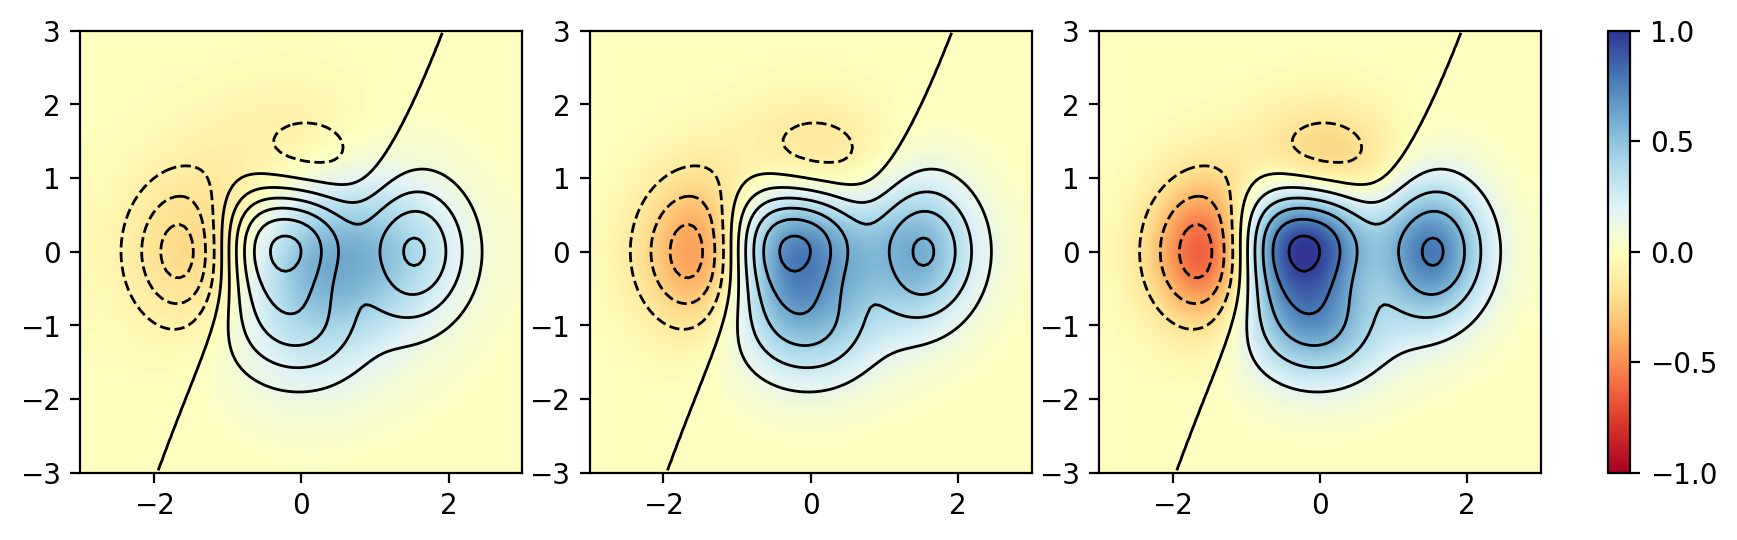

In [16]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,6));
G = GridSpec(1, 4, width_ratios=(20, 20, 20, 1))

extent = [-3,+3,-3,+3]
cmap = "RdYlBu"
interpolation = "bicubic"
vmin, vmax = -1, 1

ax = plt.subplot(G[0], aspect=1);
I = ax.imshow(Z5, extent=extent, interpolation=interpolation,
              cmap=cmap,  vmin=vmin, vmax=vmax)
C = ax.contour(Z100, levels=10, extent=extent, origin="upper",
               colors="black", linewidths=1)

ax = plt.subplot(G[1], aspect=1); 
I = ax.imshow(Z10, extent=extent, interpolation=interpolation,
              cmap=cmap,  vmin=vmin, vmax=vmax)
C = ax.contour(Z100, levels=10, extent=extent, origin="upper",
               colors="black", linewidths=1)

ax = plt.subplot(G[2], aspect=1);
I = ax.imshow(Z25, extent=extent, interpolation=interpolation,
              cmap=cmap,  vmin=vmin, vmax=vmax)
C = ax.contour(Z100, levels=10, extent=extent, origin="upper",
               colors="black", linewidths=1)
    
plt.colorbar(I, cax=plt.subplot(G[3], aspect=20))

plt.show();

There are many other things that can be done with imshow & contour and we'll some later in the advanced matplotlib series.

---

# Bar plot <a name="bar_plot"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

We'll finish this lesson with [bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) plots that are omnipresent in the scientific litterature in order to represent quantities or histograms.


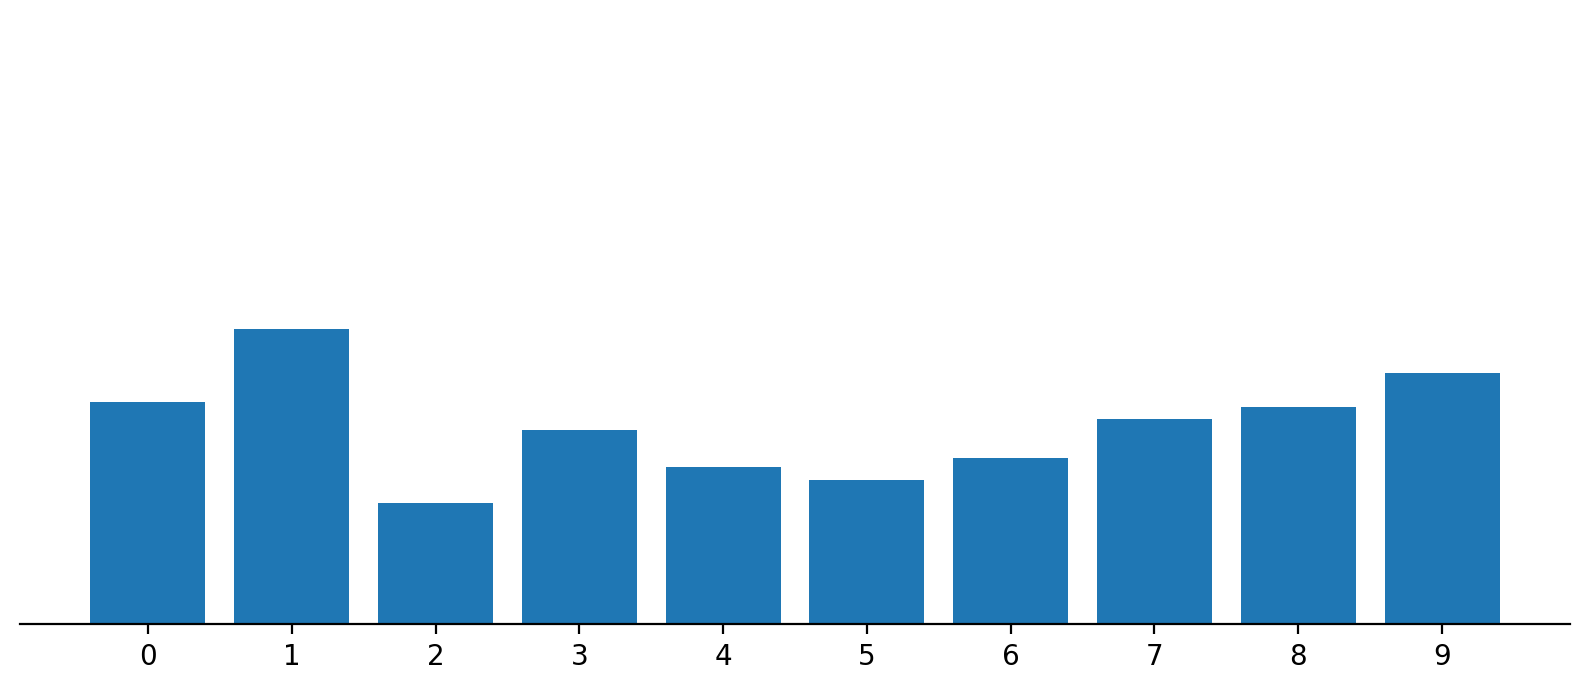

In [26]:
np.random.seed(1)
X = np.arange(0,10)
Y = np.random.uniform(0.9, 1.0, len(X))

fig = plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.bar(X, Y)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(X)
ax.set_yticks([])

ax.set_ylim(0.85,1.10)

plt.show();

When your date represents a mean, it is quite common to represent the standard deviation using an error bar.

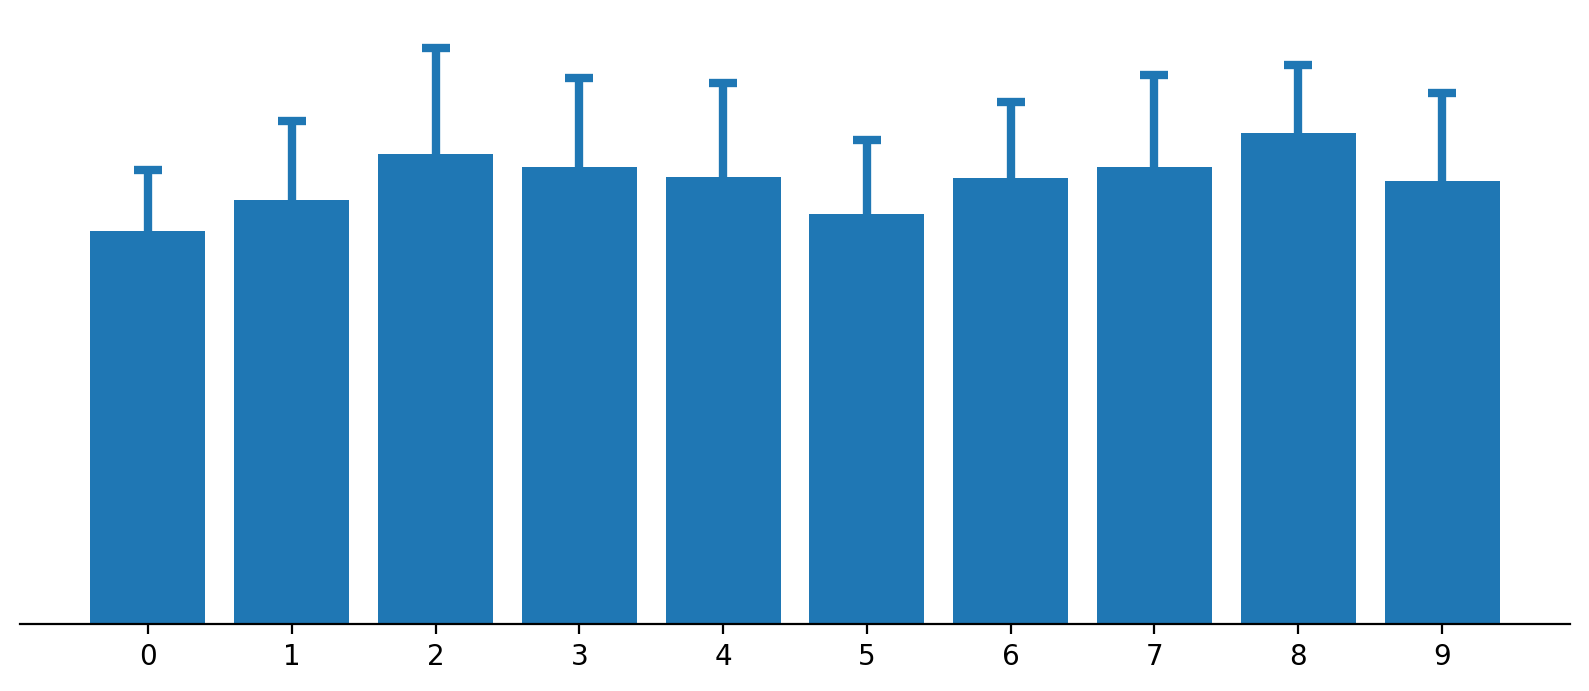

In [27]:
np.random.seed(1)
X = np.arange(0,10)
Y = np.random.uniform(0.5, 1.0, (len(X),10))

fig = plt.figure(figsize=(10,4))
ax = plt.subplot();

ax.bar(X, Y.mean(axis=1), color="C0", yerr=Y.std(axis=1), 
       error_kw=dict(ecolor="C0", linewidth=3, capsize=5, capthick=3))

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(X)
ax.set_yticks([])

plt.show();

It is also common to have several series that need to be grouped. To do that, we can use several bar plots and play with the X coordinate.

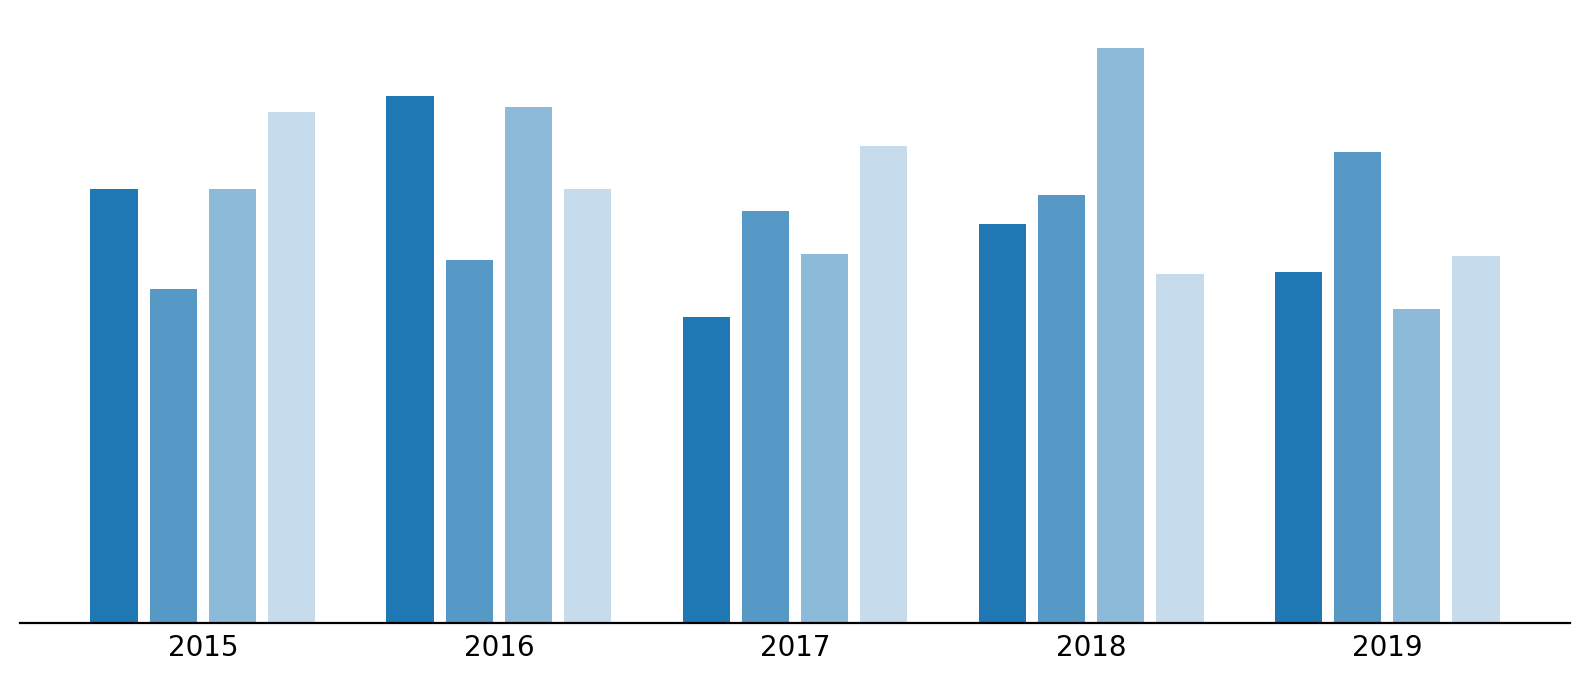

In [28]:
np.random.seed(1)
X = np.arange(0,5)
Y1 = np.random.uniform(0.5, 1.0, len(X))
Y2 = np.random.uniform(0.5, 1.0, len(X))
Y3 = np.random.uniform(0.5, 1.0, len(X))
Y4 = np.random.uniform(0.5, 1.0, len(X))
       
fig = plt.figure(figsize=(10,4));
ax = plt.subplot();

ax.bar(X*5,   Y1, color="C0", alpha=1.00)
ax.bar(X*5+1, Y2, color="C0", alpha=0.75)
ax.bar(X*5+2, Y3, color="C0", alpha=0.50)
ax.bar(X*5+3, Y4, color="C0", alpha=0.25)

ax.set_xticks(X*5+1.5)
ax.set_xticklabels(["2015","2016","2017","2018","2019"])
ax.set_yticks([])

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', size=0)

plt.show();

Similarly, we can further modify the plot with additional series below using a negative height.

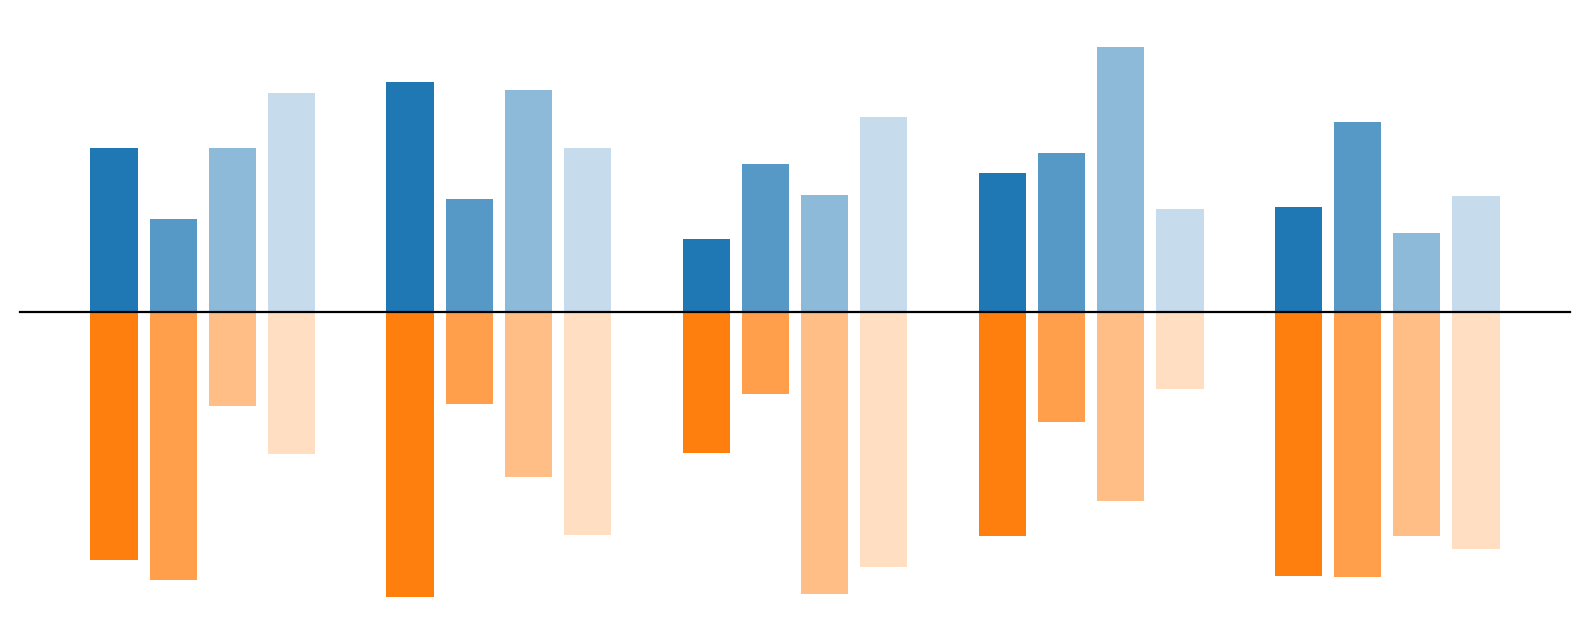

In [29]:
np.random.seed(1)
X = np.arange(0,5)
Y1 = np.random.uniform(0.25, 1.0, len(X))
Y2 = np.random.uniform(0.25, 1.0, len(X))
Y3 = np.random.uniform(0.25, 1.0, len(X))
Y4 = np.random.uniform(0.25, 1.0, len(X))
Y5 = np.random.uniform(0.25, 1.0, len(X))
Y6 = np.random.uniform(0.25, 1.0, len(X))
Y7 = np.random.uniform(0.25, 1.0, len(X))
Y8 = np.random.uniform(0.25, 1.0, len(X))
       
fig = plt.figure(figsize=(10,4));
ax = plt.subplot();

ax.bar(X*5,    Y1, color="C0", alpha=1.00)
ax.bar(X*5+1,  Y2, color="C0", alpha=0.75)
ax.bar(X*5+2,  Y3, color="C0", alpha=0.50)
ax.bar(X*5+3,  Y4, color="C0", alpha=0.25)
ax.bar(X*5,   -Y5, color="C1", alpha=1.00)
ax.bar(X*5+1, -Y6, color="C1", alpha=0.75)
ax.bar(X*5+2, -Y7, color="C1", alpha=0.50)
ax.bar(X*5+3, -Y8, color="C1", alpha=0.25)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(("data",0))

ax.set_xticks([])
ax.set_yticks([])

plt.show();

Bar plot can be also oriented horizontally using the `barh` function.

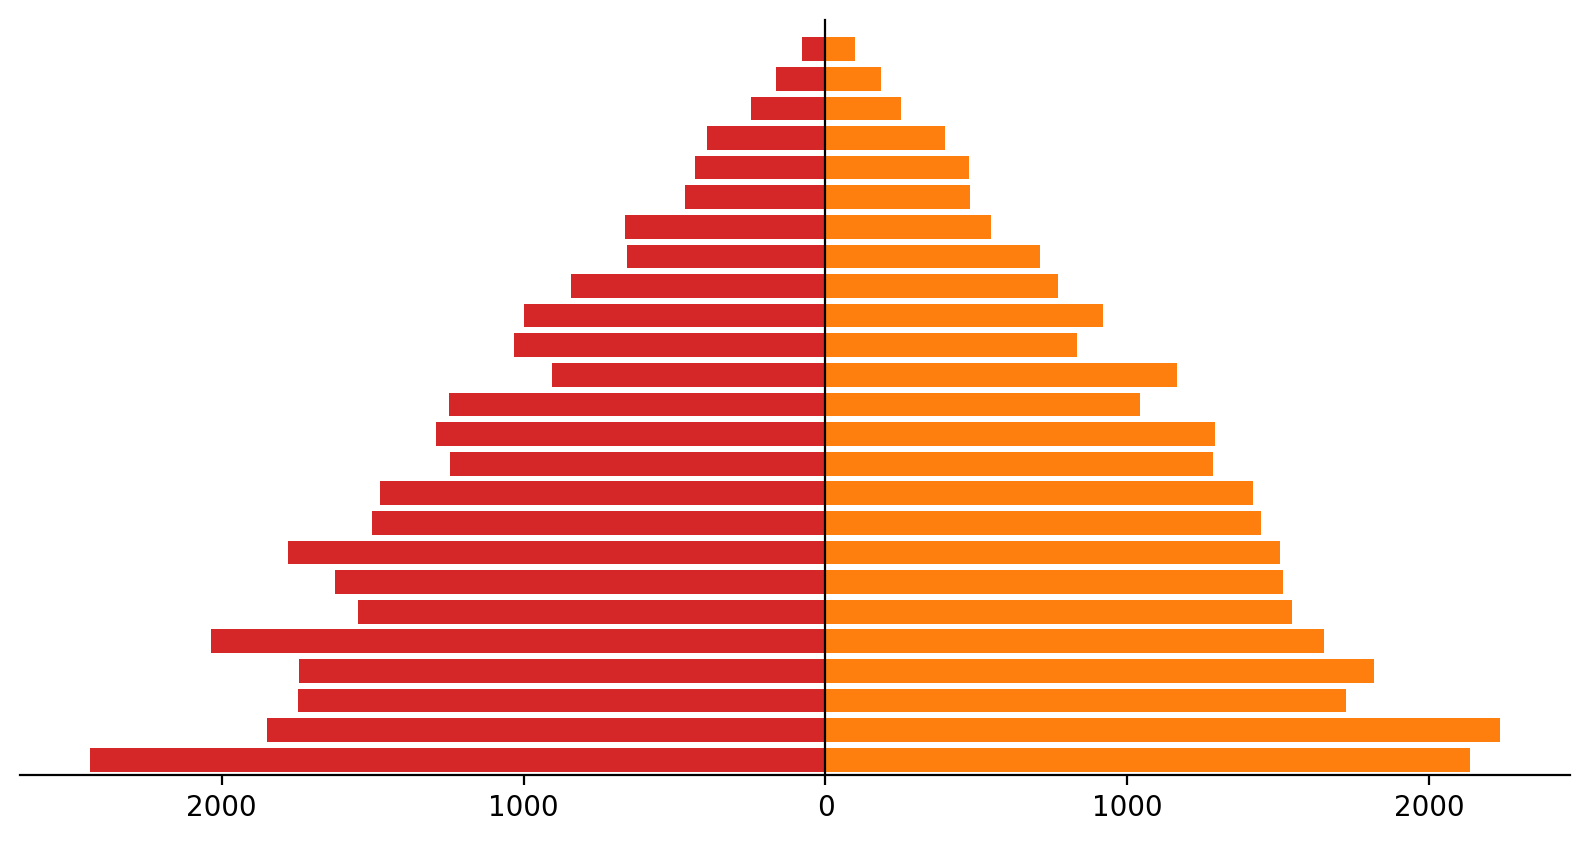

In [30]:
np.random.seed(1)
X = np.arange(0,25)
Y1 = np.random.uniform(75, 100, len(X))*(25-X)
Y2 = np.random.uniform(75, 100, len(X))*(25-X)

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1);

ax.barh(X, +Y1, color="C1")
ax.barh(X, -Y2, color="C3")

ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);
ax.spines['left'].set_position(("data",0))

ax.set_ylim(-0.5, len(X))
ax.set_xticks([-2000,-1000,0, 1000,2000]);
ax.set_xticklabels(["2000","1000","0", "1000","2000"])
ax.set_yticks([])

plt.show();

We have only scratched the surface of matplotlib and there exist many other type of plots that might be useful depending on your scientific domain. To learn about them, best is to have a look at the [cheatsheets](https://github.com/rougier/matplotlib-cheatsheet) and the [gallery](https://matplotlib.org/stable/gallery/index.html).

---

# Exercises <a name="exercises"></a>  <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

## Hexagonal scatter

Since there exists an hexagonal marker ( `h` ), it is almost straightforward to create a regular hexagonal scatter plot as shown below. Try to reproduce the figure below by first placing the marker with the right size and then try to color them.

<img src="data/02-exercise-1.png" width="100%" />

## Scatter bar

We can mix scatter and bar plot to better represent data dispersion around the mean. Try to reproduce the figure below with the exact same appearance.

<img src="data/02-exercise-2.png" width="100%" />

## Mona Lisa variations

Using the [imread](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html) function and the provided Mona Lisa [image](data/MonaLisa.jpg), try to reproduce the figure below. Be careful with the image pixel format (RGB). If you want to use a colormap, you need to extract a single channel or to convert the image to grayscale ( ` G = 0.3*R + 0.59*G + 0.11*B` ) 


<img src="data/02-exercise-3.png" width="100%" />

----

**Copyright (c) 2021 Nicolas P. Rougier**    
This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).
<br/>
Code is licensed under a [2-Clauses BSD license](https://opensource.org/licenses/BSD-2-Clause)